In [6]:
import pandas as pd
import numpy as np
import os

# Define the path to the dataset
dataset_path = 'C:/Users/pavan/OneDrive/Documents/MS Project/Datasets/PAMAP2_Dataset/Protocol/'

# Define column names based on the dataset documentation
columns = ['timestamp', 'activityID', 'heartRate', 'IMU_hand_temp', 'IMU_hand_acc_16g_x', 'IMU_hand_acc_16g_y', 'IMU_hand_acc_16g_z',
           'IMU_hand_acc_6g_x', 'IMU_hand_acc_6g_y', 'IMU_hand_acc_6g_z', 'IMU_hand_gyro_x', 'IMU_hand_gyro_y', 'IMU_hand_gyro_z',
           'IMU_hand_mag_x', 'IMU_hand_mag_y', 'IMU_hand_mag_z', 'IMU_hand_orient_1', 'IMU_hand_orient_2', 'IMU_hand_orient_3', 'IMU_hand_orient_4',
           'IMU_chest_temp', 'IMU_chest_acc_16g_x', 'IMU_chest_acc_16g_y', 'IMU_chest_acc_16g_z', 'IMU_chest_acc_6g_x', 'IMU_chest_acc_6g_y', 'IMU_chest_acc_6g_z',
           'IMU_chest_gyro_x', 'IMU_chest_gyro_y', 'IMU_chest_gyro_z', 'IMU_chest_mag_x', 'IMU_chest_mag_y', 'IMU_chest_mag_z', 'IMU_chest_orient_1', 'IMU_chest_orient_2',
           'IMU_chest_orient_3', 'IMU_chest_orient_4', 'IMU_ankle_temp', 'IMU_ankle_acc_16g_x', 'IMU_ankle_acc_16g_y', 'IMU_ankle_acc_16g_z',
           'IMU_ankle_acc_6g_x', 'IMU_ankle_acc_6g_y', 'IMU_ankle_acc_6g_z', 'IMU_ankle_gyro_x', 'IMU_ankle_gyro_y', 'IMU_ankle_gyro_z',
           'IMU_ankle_mag_x', 'IMU_ankle_mag_y', 'IMU_ankle_mag_z', 'IMU_ankle_orient_1', 'IMU_ankle_orient_2', 'IMU_ankle_orient_3', 'IMU_ankle_orient_4']

def load_subject_data(subject_id):
    file_path = os.path.join(dataset_path, f'subject{subject_id}.dat')
    data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)
    return data

# Load data for a specific subject
subject_data = load_subject_data(101)
subject_data.head()


,timestamp,activityID,heartRate,IMU_hand_temp,IMU_hand_acc_16g_x,IMU_hand_acc_16g_y,IMU_hand_acc_16g_z,IMU_hand_acc_6g_x,IMU_hand_acc_6g_y,IMU_hand_acc_6g_z,...,IMU_ankle_gyro_x,IMU_ankle_gyro_y,IMU_ankle_gyro_z,IMU_ankle_mag_x,IMU_ankle_mag_y,IMU_ankle_mag_z,IMU_ankle_orient_1,IMU_ankle_orient_2,IMU_ankle_orient_3,IMU_ankle_orient_4
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0


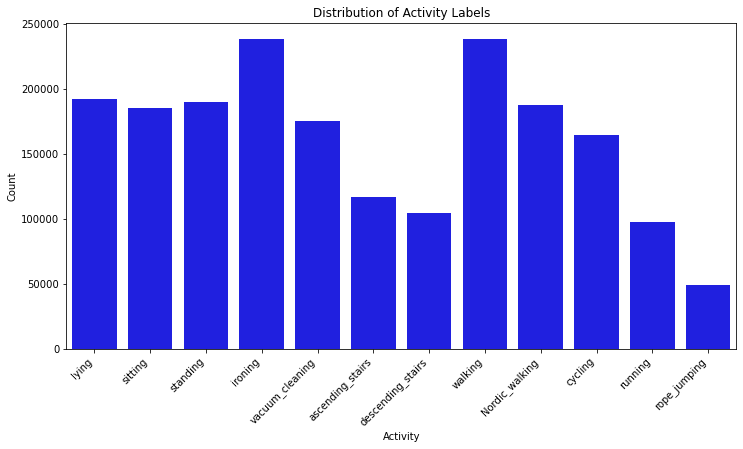

In [27]:
# Define a mapping of activity IDs to activity names
activity_map = {
    1: 'lying',
    2: 'sitting',
    3: 'standing',
    4: 'walking',
    5: 'running',
    6: 'cycling',
    7: 'Nordic_walking',
    9: 'watching_TV',
    10: 'computer_work',
    11: 'car_driving',
    12: 'ascending_stairs',
    13: 'descending_stairs',
    16: 'vacuum_cleaning',
    17: 'ironing',
    18: 'folding_laundry',
    19: 'house_cleaning',
    20: 'playing_soccer',
    24: 'rope_jumping'
}

# Replace activity IDs with activity names
all_data['activityID'] = all_data['activityID'].map(activity_map)

# Plot distribution of activity labels with blue bars and human-readable labels
plt.figure(figsize=(12, 6))
sns.countplot(data=all_data, x='activityID', color='blue')
plt.title('Distribution of Activity Labels')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()



In [28]:
# Summary statistics of the preprocessed data
summary_stats = all_data.describe()
print(summary_stats)


          timestamp     heartRate  IMU_hand_temp  IMU_hand_acc_16g_x  \
count  1.942872e+06  1.942872e+06   1.942872e+06        1.942872e+06   
mean   1.705202e+03  1.074838e+02   3.275126e+01       -4.952946e+00   
std    1.093463e+03  2.699031e+01   1.794162e+00        6.240453e+00   
min    3.120000e+01  5.700000e+01   2.487500e+01       -1.453670e+02   
25%    7.445400e+02  8.600000e+01   3.168750e+01       -8.969490e+00   
50%    1.480330e+03  1.040000e+02   3.312500e+01       -5.449750e+00   
75%    2.663610e+03  1.240000e+02   3.406250e+01       -9.576388e-01   
max    4.245680e+03  2.020000e+02   3.550000e+01        6.285960e+01   

       IMU_hand_acc_16g_y  IMU_hand_acc_16g_z  IMU_hand_acc_6g_x  \
count        1.942872e+06        1.942872e+06       1.942872e+06   
mean         3.584301e+00        3.602480e+00      -4.886450e+00   
std          6.893367e+00        3.956748e+00       6.246913e+00   
min         -1.043010e+02       -1.014520e+02      -6.121470e+01   
25%        

Number of data points of each subject.
The whole data included annotated human activity class of 9 subjects with particular physical description. Majority of the subjects are male with right dominant hand. In fact, PAMAP2 contains only one female subject and one left handed subject with id 102 and 108 respectively.


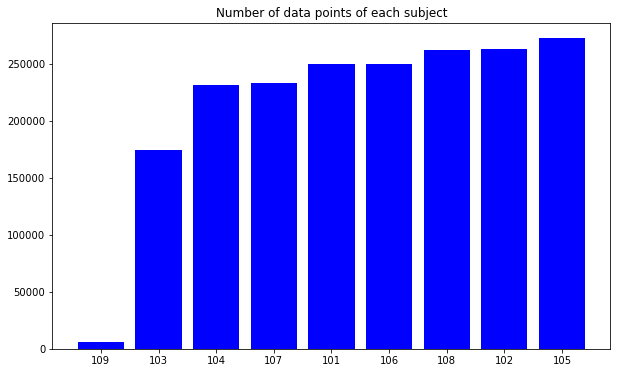

Number of data points of each class.


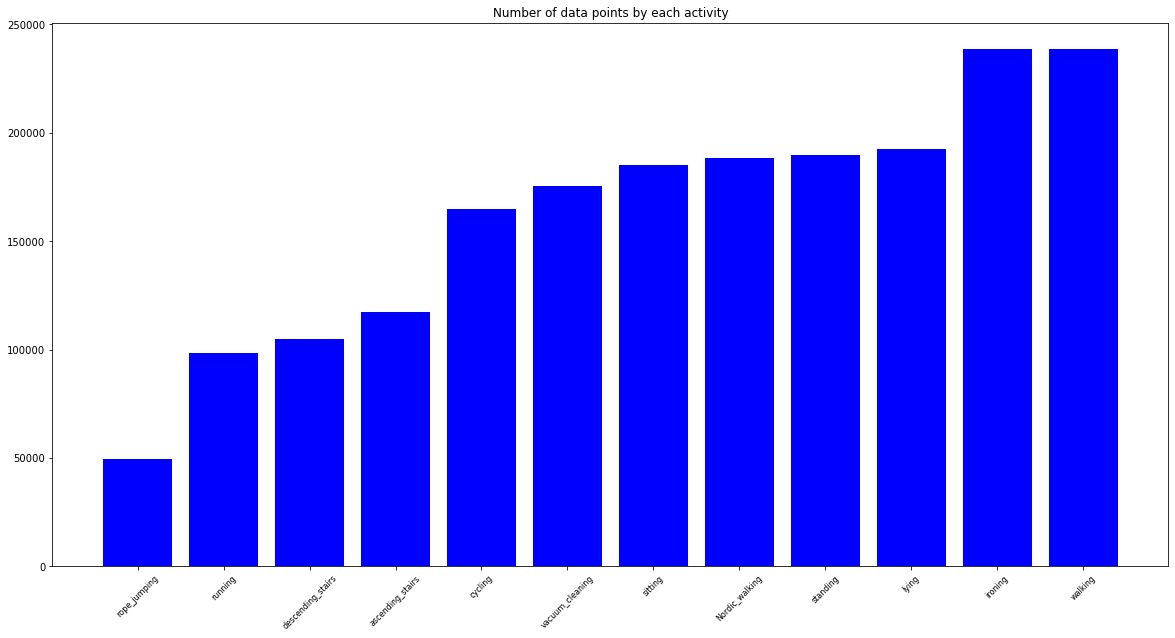

Sensor data in time domain: IMU_hand_acc_x_sc16


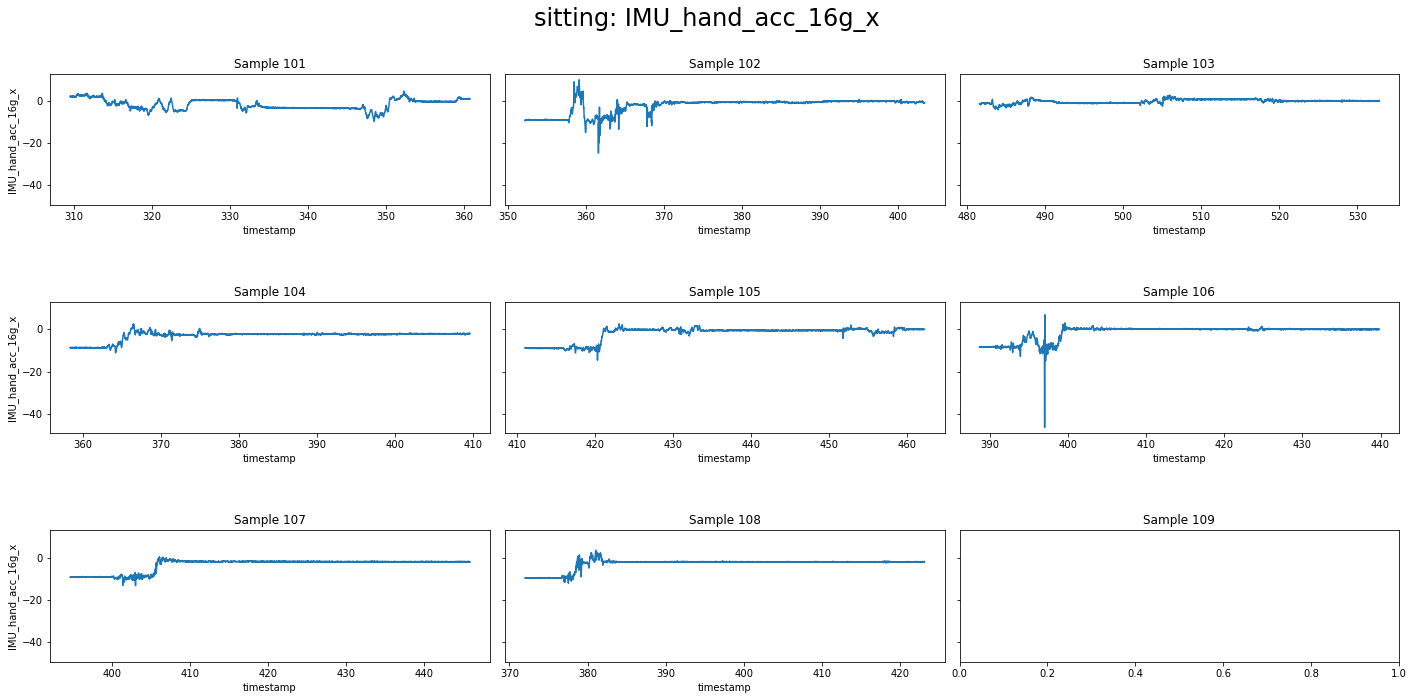

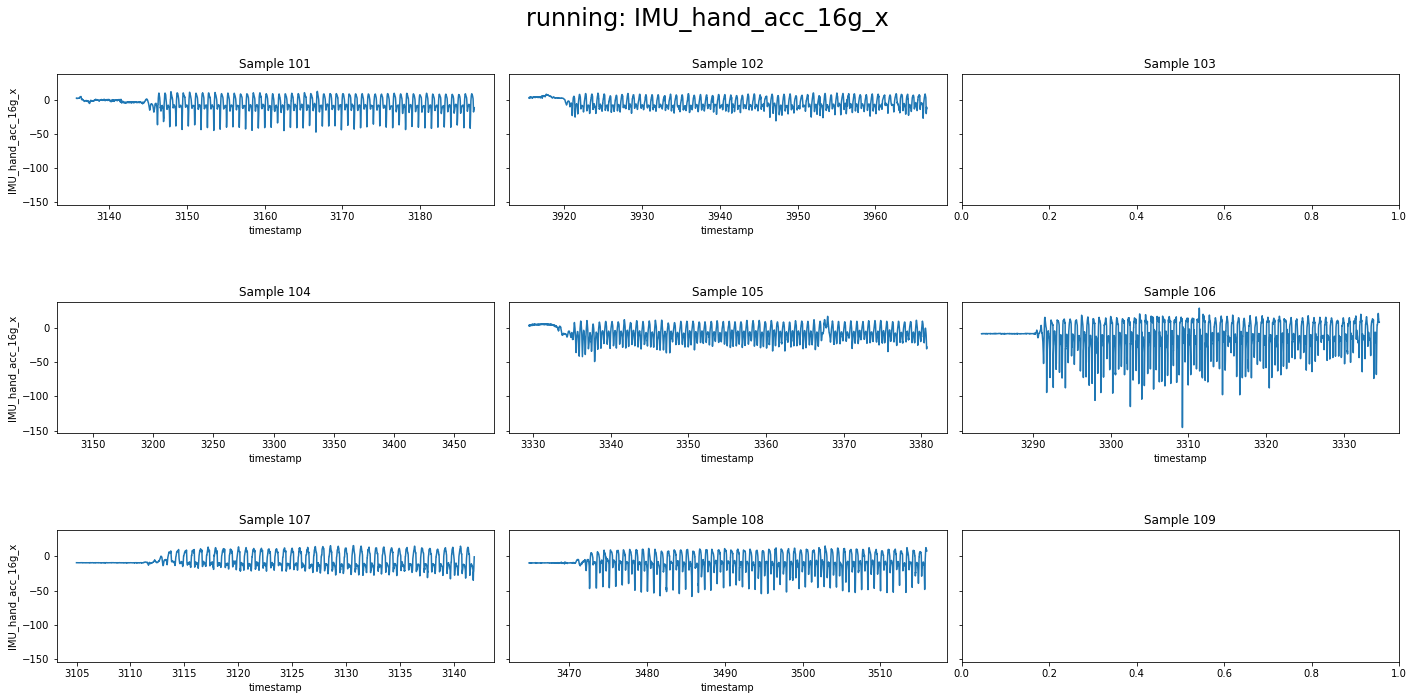

In [36]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the dataset
dataset_path = 'C:/Users/pavan/OneDrive/Documents/MS Project/Datasets/PAMAP2_Dataset/Protocol/'

# Define column names based on the dataset documentation
columns = ['timestamp', 'activityID', 'heartRate', 'IMU_hand_temp', 'IMU_hand_acc_16g_x', 'IMU_hand_acc_16g_y', 'IMU_hand_acc_16g_z',
           'IMU_hand_acc_6g_x', 'IMU_hand_acc_6g_y', 'IMU_hand_acc_6g_z', 'IMU_hand_gyro_x', 'IMU_hand_gyro_y', 'IMU_hand_gyro_z',
           'IMU_hand_mag_x', 'IMU_hand_mag_y', 'IMU_hand_mag_z', 'IMU_hand_orient_1', 'IMU_hand_orient_2', 'IMU_hand_orient_3', 'IMU_hand_orient_4',
           'IMU_chest_temp', 'IMU_chest_acc_16g_x', 'IMU_chest_acc_16g_y', 'IMU_chest_acc_16g_z', 'IMU_chest_acc_6g_x', 'IMU_chest_acc_6g_y', 'IMU_chest_acc_6g_z',
           'IMU_chest_gyro_x', 'IMU_chest_gyro_y', 'IMU_chest_gyro_z', 'IMU_chest_mag_x', 'IMU_chest_mag_y', 'IMU_chest_mag_z', 'IMU_chest_orient_1', 'IMU_chest_orient_2',
           'IMU_chest_orient_3', 'IMU_chest_orient_4', 'IMU_ankle_temp', 'IMU_ankle_acc_16g_x', 'IMU_ankle_acc_16g_y', 'IMU_ankle_acc_16g_z',
           'IMU_ankle_acc_6g_x', 'IMU_ankle_acc_6g_y', 'IMU_ankle_acc_6g_z', 'IMU_ankle_gyro_x', 'IMU_ankle_gyro_y', 'IMU_ankle_gyro_z',
           'IMU_ankle_mag_x', 'IMU_ankle_mag_y', 'IMU_ankle_mag_z', 'IMU_ankle_orient_1', 'IMU_ankle_orient_2', 'IMU_ankle_orient_3', 'IMU_ankle_orient_4']

def load_subject_data(subject_id):
    file_path = os.path.join(dataset_path, f'subject{subject_id}.dat')
    data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)
    data['subject'] = subject_id
    return data

# Load data for all subjects
all_subjects_data = pd.DataFrame()
for subject_id in range(101, 110):
    subject_data = load_subject_data(subject_id)
    all_subjects_data = pd.concat([all_subjects_data, subject_data], ignore_index=True)

# Fill missing values
all_subjects_data.fillna(method='ffill', inplace=True)

# Filter out invalid activity IDs (assuming valid IDs are between 1 and 24)
valid_activities = list(range(1, 25))
all_subjects_data = all_subjects_data[all_subjects_data['activityID'].isin(valid_activities)]

# Reset index after filtering
all_subjects_data.reset_index(drop=True, inplace=True)

# Define a mapping of activity IDs to activity names
activity_map = {
    1: 'lying',
    2: 'sitting',
    3: 'standing',
    4: 'walking',
    5: 'running',
    6: 'cycling',
    7: 'Nordic_walking',
    9: 'watching_TV',
    10: 'computer_work',
    11: 'car_driving',
    12: 'ascending_stairs',
    13: 'descending_stairs',
    16: 'vacuum_cleaning',
    17: 'ironing',
    18: 'folding_laundry',
    19: 'house_cleaning',
    20: 'playing_soccer',
    24: 'rope_jumping'
}

# Replace activity IDs with activity names
all_subjects_data['activityID'] = all_subjects_data['activityID'].map(activity_map)

# Number of data points of each subject
print("Number of data points of each subject.")
print("The whole data included annotated human activity class of 9 subjects with particular physical description. Majority of the subjects are male with right dominant hand. In fact, PAMAP2 contains only one female subject and one left handed subject with id 102 and 108 respectively.")

samples = all_subjects_data.groupby(['subject']).count().reset_index()
samples_to_subject = pd.DataFrame()
samples_to_subject['subject'] = samples['subject']
samples_to_subject['samples'] = samples['timestamp']
samples_to_subject = samples_to_subject.sort_values(by=['samples'])

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(len(samples_to_subject)), samples_to_subject['samples'], color='blue')
ax.set_xticks(np.arange(len(samples_to_subject)))
ax.set_xticklabels(samples_to_subject['subject'])
ax.set_title("Number of data points of each subject")
plt.show()

# Number of data points by each activity
print("Number of data points of each class.")

samples = all_subjects_data.groupby(['activityID']).count().reset_index()
samples_to_subject = pd.DataFrame()
samples_to_subject['activityID'] = samples['activityID']
samples_to_subject['samples'] = samples['timestamp']
samples_to_subject = samples_to_subject.sort_values(by=['samples'])

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(range(len(samples_to_subject)), samples_to_subject['samples'], color='blue')
ax.set_xticks(np.arange(len(samples_to_subject)))
ax.set_xticklabels(samples_to_subject['activityID'], fontdict={'fontsize':8}, rotation=45)
ax.set_title("Number of data points by each activity")
plt.show()

# Plot sensor data
def plot_sensor_data_fft(col, activity_id):
    fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20,10), sharey=True)
    ax = ax.flatten()
    fig.suptitle(f"{activity_map[activity_id]}: {col}", fontsize=24)

    for index in range(9):
        df = all_subjects_data[(all_subjects_data['subject'] == 101+index) & (all_subjects_data['activityID'] == activity_map[activity_id])][:5120]
        sns.lineplot(data=df, y=col, x='timestamp', ax=ax[index])
        ax[index].set_title(f"Sample 10{index+1}")
    plt.tight_layout(pad=2, w_pad=0.7, h_pad=5.0)
    plt.show()

# Example plots
print("Sensor data in time domain: IMU_hand_acc_x_sc16")
plot_sensor_data_fft(col='IMU_hand_acc_16g_x', activity_id=2)  # Sitting
plot_sensor_data_fft(col='IMU_hand_acc_16g_x', activity_id=5)  # Running


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Define the path to the CSV dataset
dataset_path = 'C:/Users/pavan/OneDrive/Documents/MS Project/Datasets/PAMAP2_Dataset/PAMAP2.csv'

# Load the data from the CSV file
data = pd.read_csv(dataset_path)

# Display the first few rows of the loaded data
print(data.head())

# Trim down sensor data
def trim_data(data, window_size=100):
    trimmed_data = pd.DataFrame()
    grouped_data = data.groupby('activityID')
    
    for name, group in grouped_data:
        if len(group) > 2 * window_size:
            trimmed_data = pd.concat([trimmed_data, group.iloc[window_size:-window_size]])
    
    return trimmed_data.reset_index(drop=True)

all_subjects_data_trimmed = trim_data(data)

def segment_data_in_batches(data, window_size=512, step_size=100, batch_size=1000):
    num_batches = len(data) // batch_size + 1
    
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(data))
        batch_data = data[start_idx:end_idx]
        
        segments = []
        labels = []
        
        for start in range(0, len(batch_data) - window_size, step_size):
            end = start + window_size
            segment = batch_data.iloc[start:end, 3:].values
            label = batch_data.iloc[start:end]['activityID'].mode()[0]
            
            if segment.shape == (window_size, data.shape[1] - 3):
                segments.append(segment)
                labels.append(label)
        
        if segments:
            yield np.array(segments), np.array(labels)

segments_list = []
labels_list = []

for segments_batch, labels_batch in segment_data_in_batches(all_subjects_data_trimmed):
    segments_list.append(segments_batch)
    labels_list.append(labels_batch)

segments = np.vstack(segments_list)
labels = np.hstack(labels_list)

print(f'Segments shape: {segments.shape}')
print(f'Labels shape: {labels.shape}')

def normalize_data(segments):
    scaler = StandardScaler()
    num_segments, window_size, num_features = segments.shape
    segments_reshaped = segments.reshape(-1, num_features)
    segments_normalized = scaler.fit_transform(segments_reshaped)
    return segments_normalized.reshape(num_segments, window_size, num_features)

segments_normalized = normalize_data(segments)

def balance_data(segments, labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    max_class_size = counts.max()
    
    balanced_segments = []
    balanced_labels = []
    
    for label in unique_labels:
        label_segments = segments[labels == label]
        if len(label_segments) < max_class_size:
            label_segments = resample(label_segments, replace=True, n_samples=max_class_size, random_state=42)
        balanced_segments.append(label_segments)
        balanced_labels.extend([label] * max_class_size)
    
    return np.vstack(balanced_segments), np.array(balanced_labels)

balanced_segments, balanced_labels = balance_data(segments_normalized, labels)

num_segments, window_size, num_features = balanced_segments.shape
X = balanced_segments.reshape(num_segments, -1)
y = balanced_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


             activityID  heart_rate  hand temperature (°C)  \
0  transient activities       104.0                   30.0   
1  transient activities       104.0                   30.0   
2  transient activities       104.0                   30.0   
3  transient activities       104.0                   30.0   
4  transient activities       104.0                   30.0   

   hand acceleration X ±16g  hand acceleration Y ±16g  \
0                   2.37223                   8.60074   
1                   2.18837                   8.56560   
2                   2.37357                   8.60107   
3                   2.07473                   8.52853   
4                   2.22936                   8.83122   

   hand acceleration Z ±16g  hand gyroscope X  hand gyroscope Y  \
0                   3.51048         -0.092217          0.056812   
1                   3.66179         -0.024413          0.047759   
2                   3.54898         -0.057976          0.032574   
3               